# Where to Open a New Coffee Shop in Denver?

# 📄 Brief

## 📖 Background
We are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Our client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Our team collected geographical and demographic information about Denver's neighborhoods to assist the search. We also collected data for coffee shop stores in Denver. Old or new coffee shop do not compete for the same clients; the team included their location as a reference.

## 💾 The data
We have assembled information from three different sources

### Coffee Shop locations in Denver, Colorado
Coffee Shop locations were scrapped from the Coffee Shop store locator webpage by [Chris Meller](https://github.com/chrismeller/)

- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

### Neighborhoods' geographical information
Statistical Neighborhood information from the [City of Denver Open Data Catalog](https://denvergov.org/opendata), CC BY 3.0 license.

- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

### Demographic information
Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information.

- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

## 💪 Challenge
Provide our client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Coffee Shop store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

# 🗂️ Data Prep & EDA

## ⚙️ Setup

In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import MinMaxScaler

## ☕Coffee Shop Data

In [2]:
# Read data - Coffee Shop in Denver
coffee = pd.read_csv('./data/denver.csv')
coffee

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [23]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB


This dataset looks good overall, it mainly constains information about the 78 Coffee Shop in the region. In this case, the attributes with missing data are not important for what we are trying to analyze. (Phone number, St 2 & St 3)

## 🏘️ Neighborhoods Data

In [3]:
# Read data of neighborhood in Denver Metropolitan Statistical Area (MSA)
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [24]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NBHD_ID    78 non-null     int64   
 1   NBHD_NAME  78 non-null     object  
 2   geometry   78 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.0+ KB


The neighborhoods dataset looks good (no missing data). It also contains a `geometry` column with polygons, these are useful to plot a shape or area on a map.

## 📖 Census 2010 Data

In [4]:
# Read census data
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


In [25]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NBHD_ID          78 non-null     int64  
 1   NBHD_NAME        78 non-null     object 
 2   POPULATION_2010  78 non-null     float64
 3   AGE_LESS_18      78 non-null     float64
 4   AGE_18_TO_34     78 non-null     float64
 5   AGE_35_TO_65     78 non-null     float64
 6   AGE_65_PLUS      78 non-null     float64
 7   NUM_HOUSEHOLDS   78 non-null     float64
 8   FAMILIES         78 non-null     float64
 9   NUM_HHLD_100K+   48 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.2+ KB


We can tell that there are 30 neighborhood without affluent households.

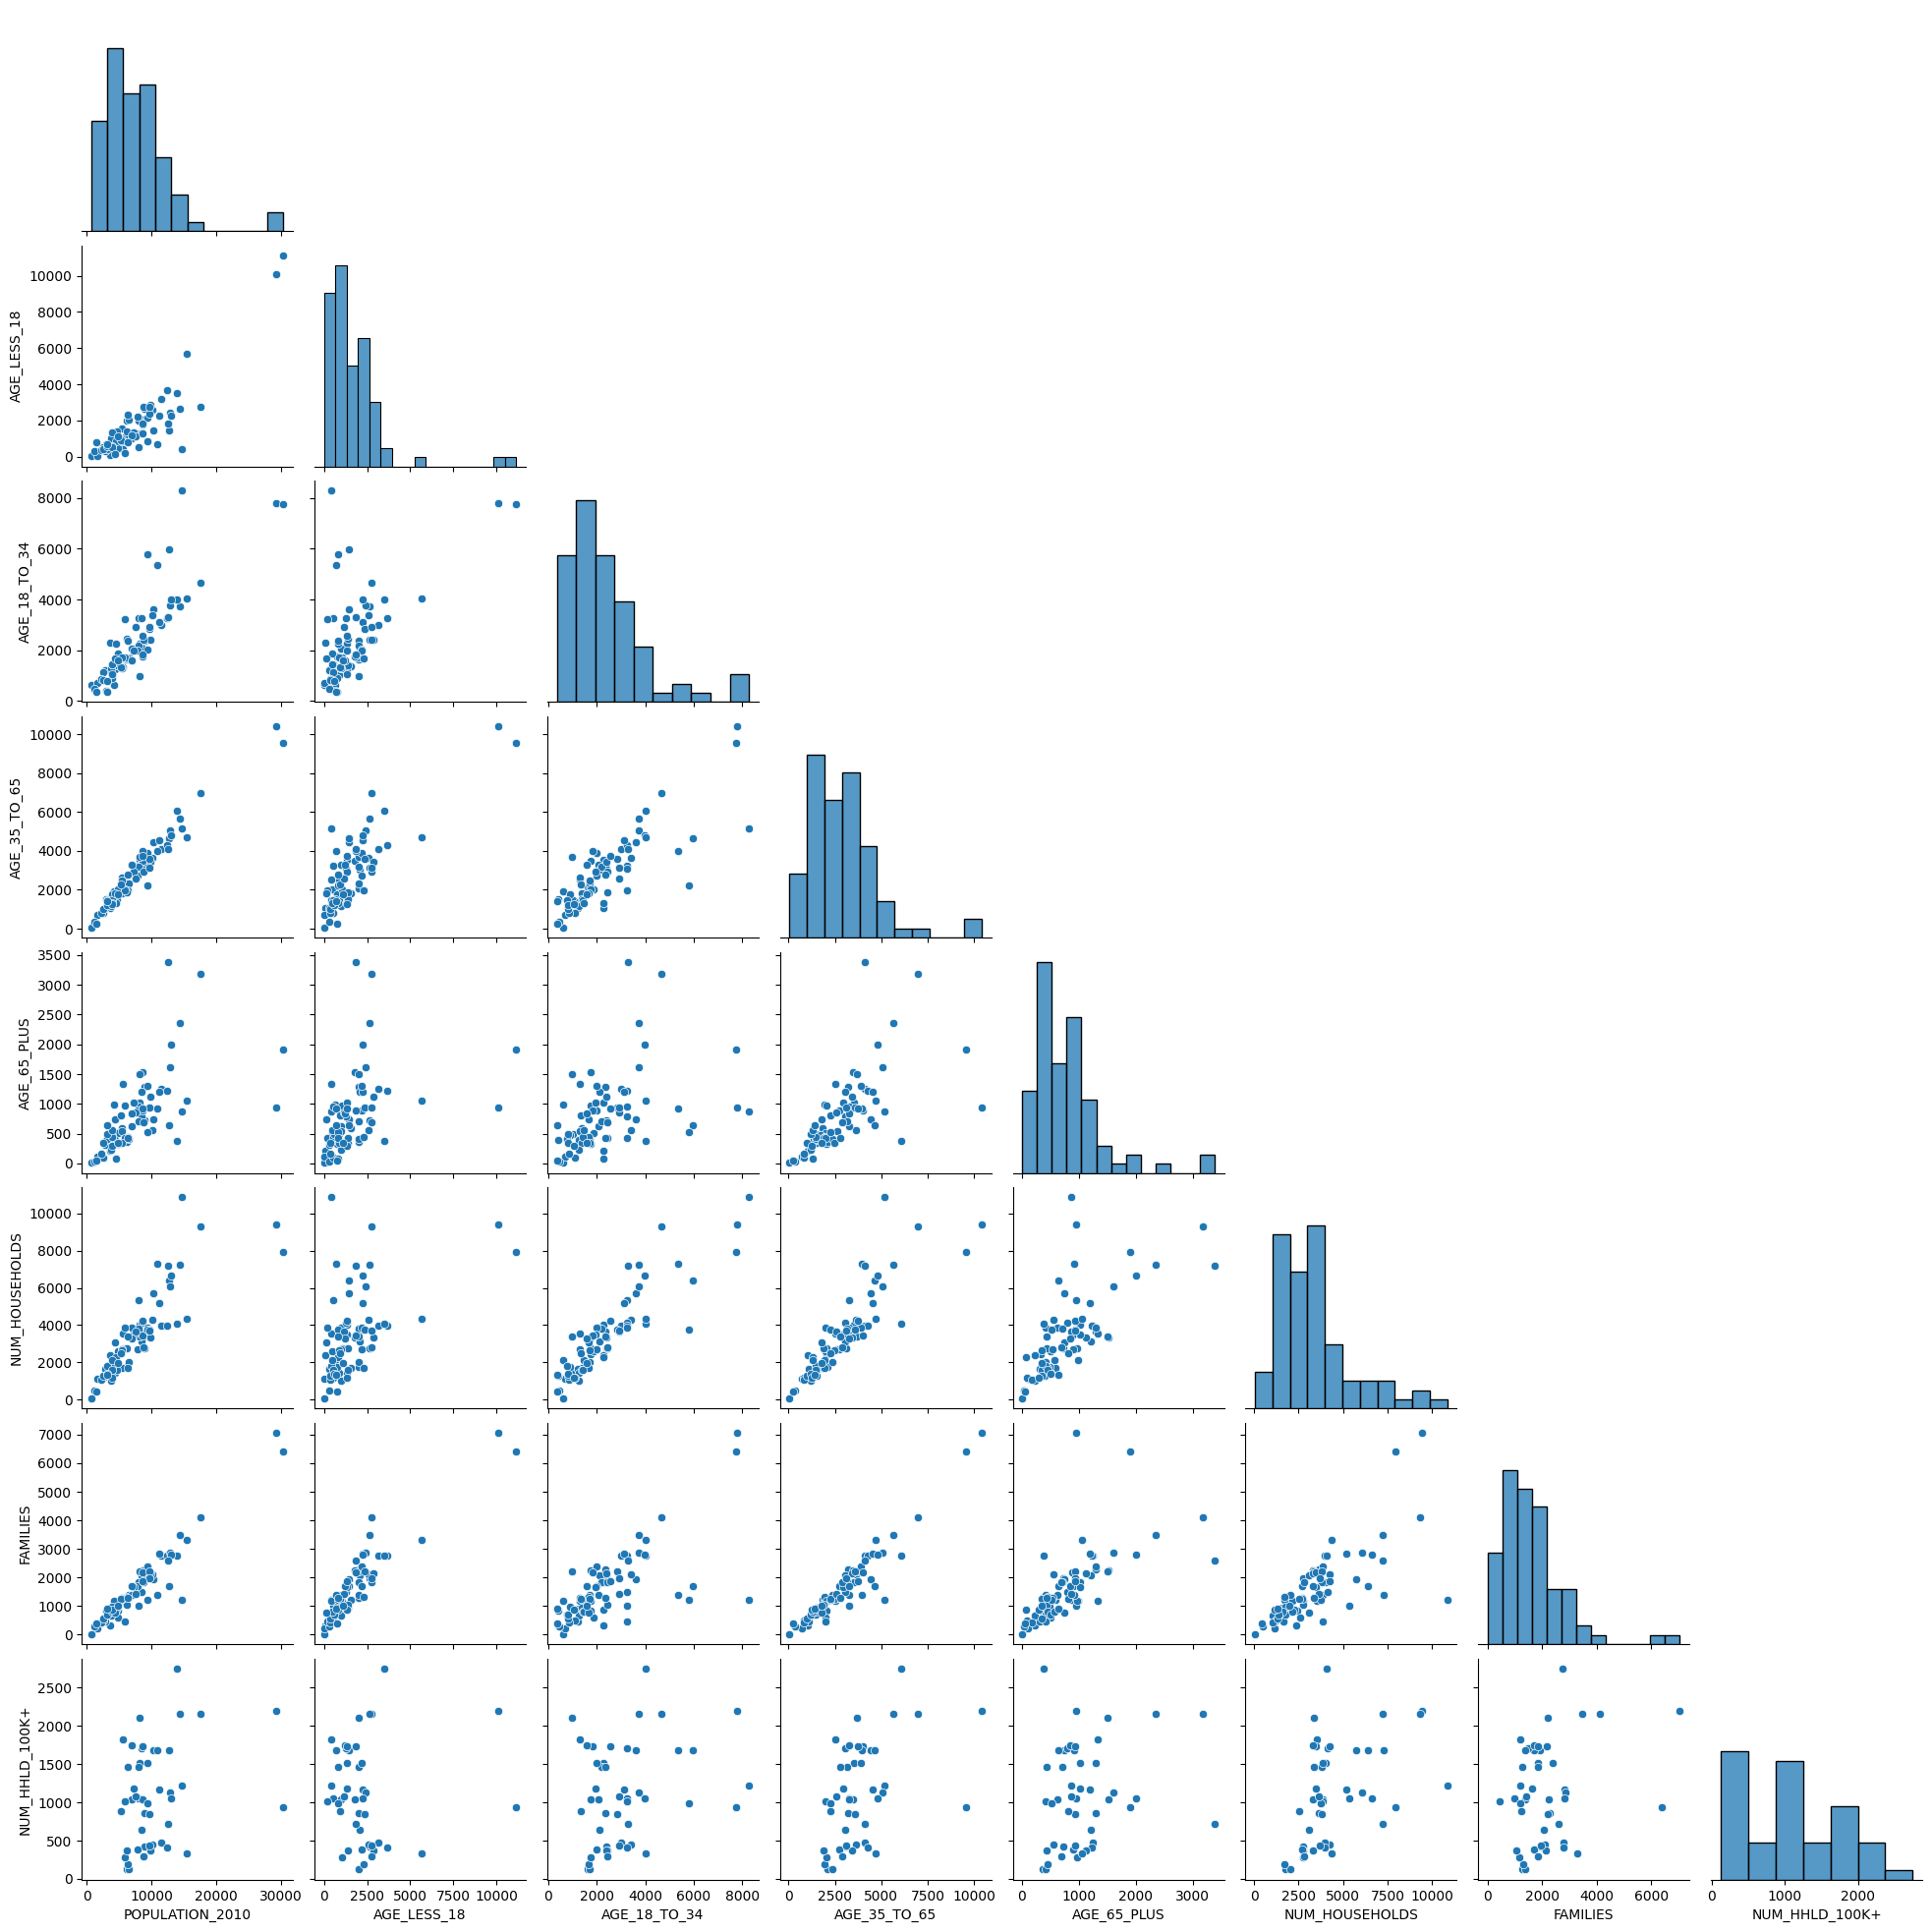

In [5]:
# Examine the relationship between variables in the `census` dataset
sns.pairplot(census.iloc[:, 2:], corner=True)
plt.show()

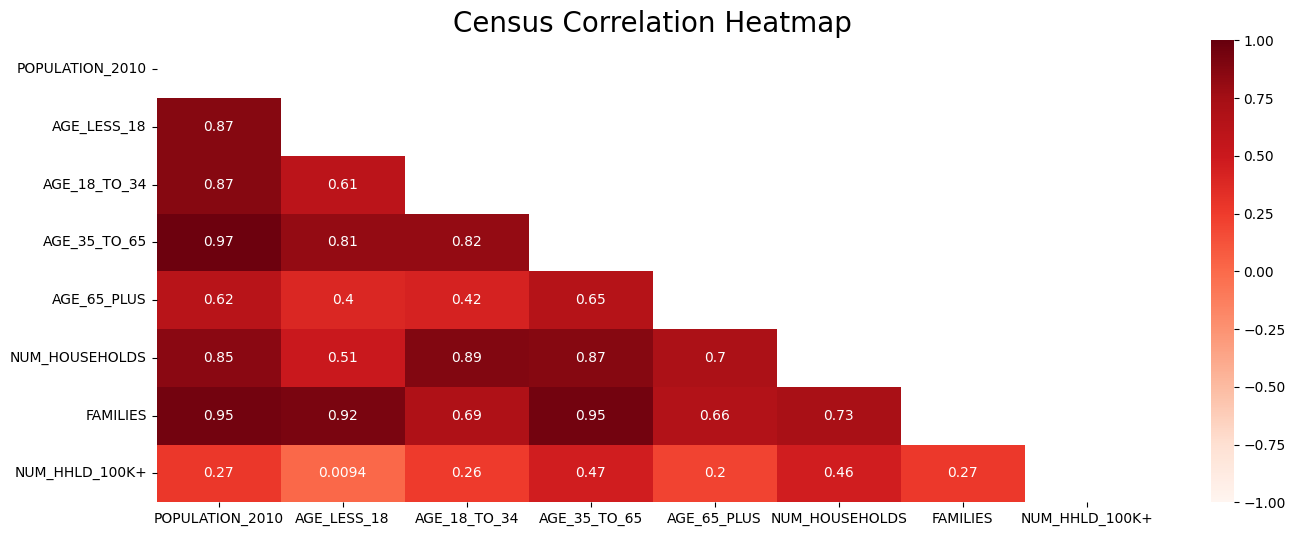

In [6]:
# Set figure
plt.figure(figsize=(16, 6))
 
# Create a mask
mask = np.triu(np.ones_like(census.iloc[:, 2:].corr(), dtype=np.bool))
 
# Create Correlogram
heatmap = sns.heatmap(census.iloc[:, 2:].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds')
 
# Settings
heatmap.set_title('Census Correlation Heatmap', fontdict={'fontsize':20})
plt.show()

The census dataset looks good, it provides expected results. These variables appear to be right skewed. The variable `POPULATION_2010` is strongly correlated with most of the remaining variables. Let's examine the summary statistics of the census data.

In [7]:
# Display summary statistics
census.iloc[:, 2:].describe().round(3)

,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
count,78.000,78.000,78.000,78.000,78.000,78.000,78.000,48.000
mean,7694.333,1650.846,2375.359,2871.564,796.564,3373.167,1602.615,1095.208
std,5166.831,1778.296,1657.968,1831.507,617.882,2145.794,1183.566,650.866
min,705.000,7.000,360.000,57.000,6.000,60.000,15.000,120.000
25%,4213.000,680.750,1307.250,1514.000,404.000,1773.750,855.000,439.250
50%,6701.500,1300.000,1984.000,2594.000,665.500,3086.000,1290.000,1043.500
75%,9640.000,2150.500,3090.500,3667.000,987.000,3985.750,2095.000,1680.000
max,30348.000,11137.000,8274.000,10405.000,3383.000,10856.000,7056.000,2748.000


We can observe that these columns have different variances and ranges. In the next steps, we are going to discuss an approach to compare each neighborhood in the same scale, in other words, let's compare the neighborhoods apples-to-apples.

A useful tool often used by statisticians when comparing population data is to express results as ratios, which allows to draw conclusions about different-sized groups in a easy interpretable way.

For instance, a ratio is expressed like this 1:2 which means there is 1 of something for every 2 of something.

In the following code snippets, we are going to transform some of the columns/features in the census data to ratios. **We want to know how many people are in each neighborhood for every 100 people in the total population of a neighborhood relative to each column/feature?**

In [8]:
# Copy the `census` data
census_ratios = census.copy()
 
# Obtain population quotient
pop_quotient = round(census_ratios['POPULATION_2010']/100)
 
# Select columns of interest
cols = census_ratios.columns[3:]
 
# Apply ratios
for col in cols:
    series = round(census_ratios[col]/pop_quotient)
    census_ratios[col+'_PER_100_PEOPLE'] = series

# Remove non-ratio columns, except `POPULATION_2010`
census_ratios.drop(labels=list(census.columns[3:]), axis=1, inplace=True)
census_ratios

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18_PER_100_PEOPLE,AGE_18_TO_34_PER_100_PEOPLE,AGE_35_TO_65_PER_100_PEOPLE,AGE_65_PLUS_PER_100_PEOPLE,NUM_HOUSEHOLDS_PER_100_PEOPLE,FAMILIES_PER_100_PEOPLE,NUM_HHLD_100K+_PER_100_PEOPLE
0,1,Athmar Park,8898.0,30.0,27.0,35.0,8.0,31.0,22.0,5.0
1,2,Auraria,705.0,1.0,91.0,8.0,1.0,9.0,2.0,NaN
2,3,Baker,4879.0,15.0,36.0,42.0,7.0,50.0,17.0,NaN
3,4,Barnum,6111.0,33.0,27.0,34.0,6.0,29.0,21.0,2.0
4,5,Barnum West,5376.0,29.0,26.0,34.0,11.0,32.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,28.0,30.0,32.0,10.0,38.0,20.0,4.0
74,75,West Highland,8540.0,15.0,30.0,44.0,11.0,50.0,22.0,20.0
75,76,Westwood,15486.0,37.0,26.0,30.0,7.0,28.0,21.0,2.0
76,77,Whittier,4831.0,23.0,33.0,37.0,7.0,42.0,21.0,NaN


Let's interpret one of these ratios above as an example.

Observe the neighborhood of Auraria (second row), which is where the Metropolitan State University of Denver is located, and let's look at the number displayed in the `AGE_LESS_18_PER_100_PEOPLE` column.

We can interpret it as the following, for ever 100 people in this neighborhood, there is 1 person of age 17 or younger.

This is easier to interpret and more useful when comparing among other groups than saying, 1% (7/705) of the population in the neighborhood of Auraria has 17 years of age or less, compared to the Central Business District (CBD) which has 2% (84/3648). This interpretation does not compare them apples-to-apples.

In ratios, we can observe below that CBD has 1 more person in this age group for every 100 people compared to Auraria.

# 🗺️ Where are the Coffee Shops located in Denver?

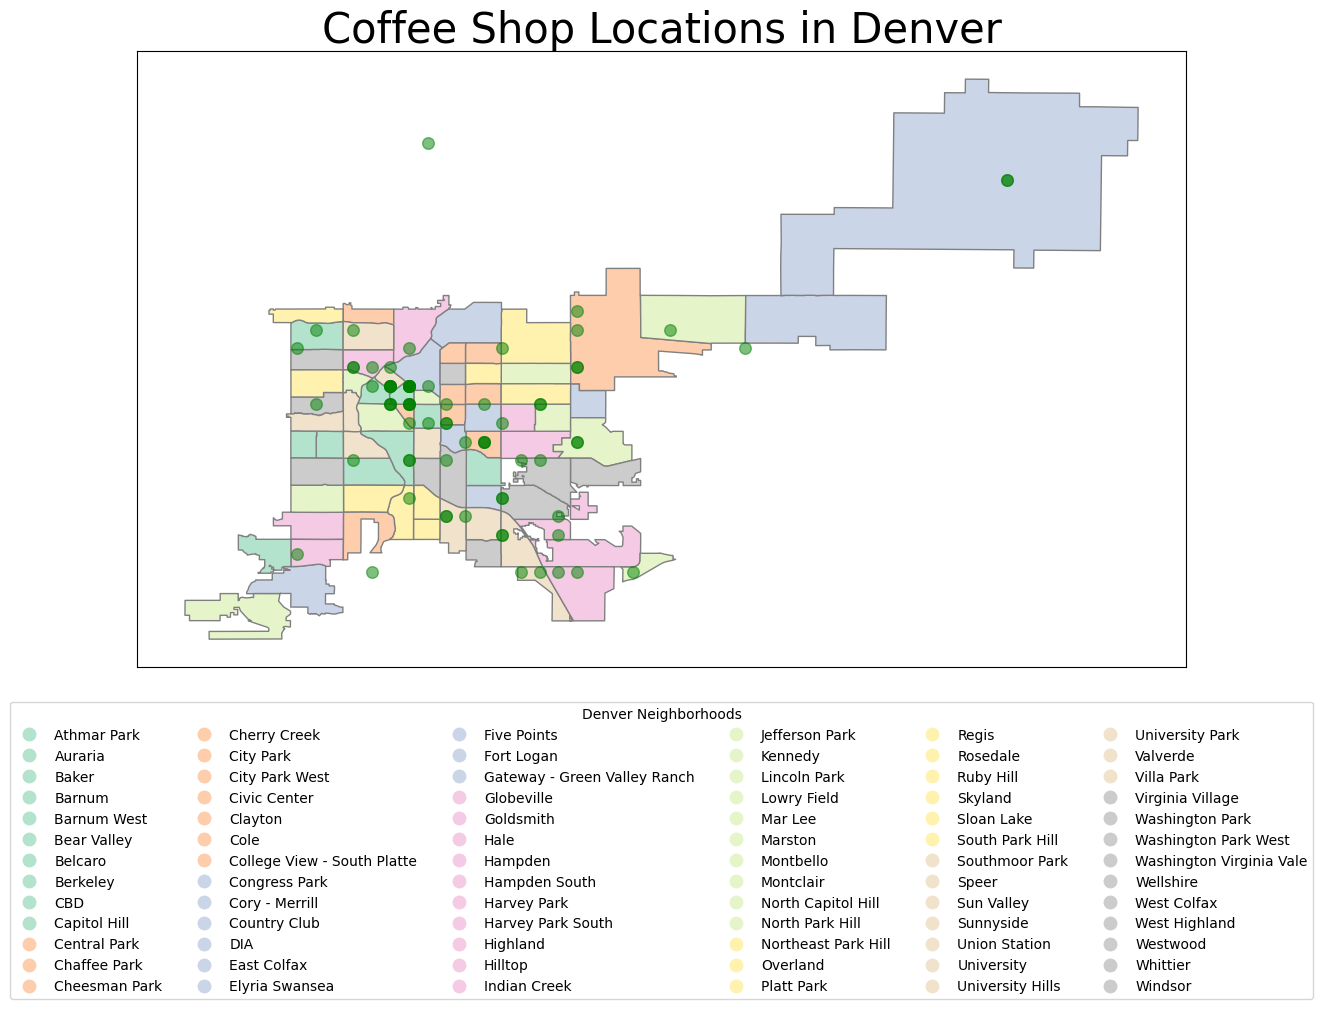

In [9]:
# Display Coffee Shop in Denver
 
# Legend settings
leg_kwds = {'title': 'Denver Neighborhoods',
           'loc': 'lower center',
           'bbox_to_anchor': (0.5, -0.55),
           'ncol': 6}
 
# Plot neighborhoods
neighborhoods.plot(legend=True, edgecolor='gray', column='NBHD_NAME',
                   legend_kwds=leg_kwds, cmap='Pastel2', figsize=(15,8))
 
# Plot Coffee Shop
plt.scatter(x=coffee.Longitude, y=coffee.Latitude,
            c='green', s=70, alpha=0.5).set_label('Coffee Shop')
 
# Plot settings
plt.title('Coffee Shop Locations in Denver', fontsize=30)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# plt.legend(loc='upper left') 
plt.show()

The green circles represent the Coffee Shop locations, we can observe there are a few locations outside of Denver. These areas are Thorton in the North, Englewood in the South, and Aurora in East Central. The Coffee Shop location in the upper right corner is located in the Denver International Airport (DIA).

## Top 3 Neighborhoods with the Highest Population

In [10]:
# Merge `neighborhoods` with `census_ratios`
neighborhoods_census = neighborhoods.merge(right=census_ratios, on=['NBHD_ID', 'NBHD_NAME'])
neighborhoods_census

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18_PER_100_PEOPLE,AGE_18_TO_34_PER_100_PEOPLE,AGE_35_TO_65_PER_100_PEOPLE,AGE_65_PLUS_PER_100_PEOPLE,NUM_HOUSEHOLDS_PER_100_PEOPLE,FAMILIES_PER_100_PEOPLE,NUM_HHLD_100K+_PER_100_PEOPLE
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",705.0,1.0,91.0,8.0,1.0,9.0,2.0,NaN
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",3892.0,20.0,23.0,45.0,12.0,45.0,25.0,NaN
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",4172.0,15.0,15.0,46.0,24.0,51.0,28.0,NaN
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",6905.0,17.0,23.0,47.0,12.0,48.0,25.0,25.0
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,13.0,37.0,44.0,7.0,53.0,20.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7...",4831.0,23.0,33.0,37.0,7.0,42.0,21.0,NaN
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7...",4651.0,30.0,30.0,32.0,7.0,34.0,20.0,NaN
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7...",15486.0,37.0,26.0,30.0,7.0,28.0,21.0,2.0
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7...",9726.0,24.0,29.0,37.0,10.0,39.0,23.0,9.0


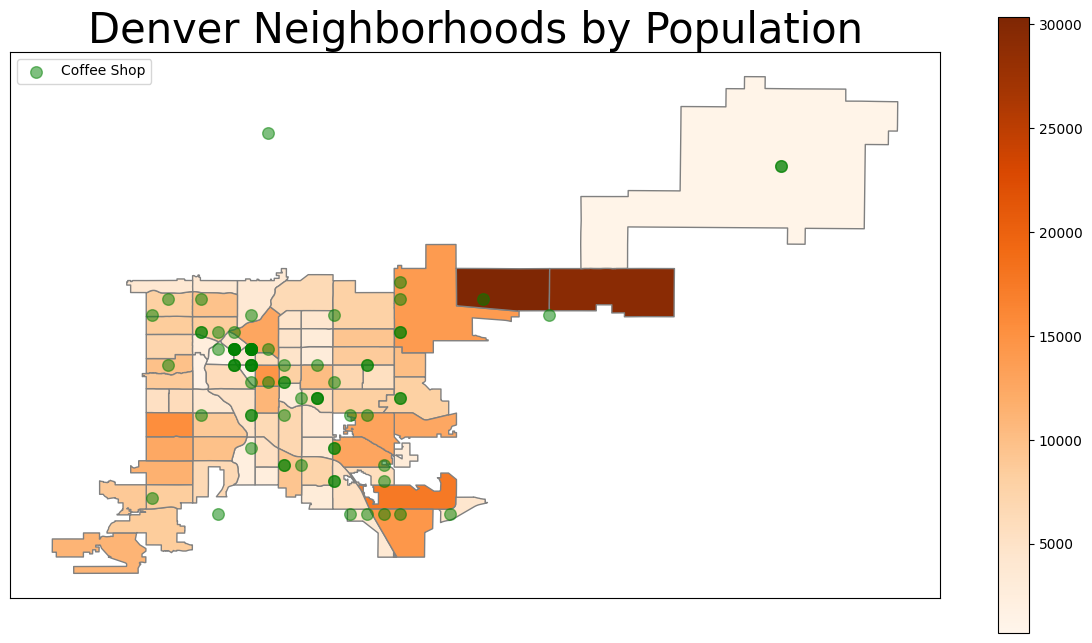

In [11]:
# Plot Neighborhoods
neighborhoods_census.plot(legend=True, edgecolor='gray',
                          column='POPULATION_2010', cmap='Oranges',
                          figsize=(15,8))
 
# Plot Coffee Shop
plt.scatter(x=coffee.Longitude, y=coffee.Latitude,
            c='green', s=70, alpha=0.5).set_label('Coffee Shop')
plt.title('Denver Neighborhoods by Population', fontsize=30)
 
# Plot Settings
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.legend(loc='upper left')

plt.show()

In [12]:
# Top 3 neighborhoods by population
nbhd_pop = neighborhoods_census.sort_values('POPULATION_2010', ascending=False)
nbhd_pop[['NBHD_NAME', 'POPULATION_2010']].head(3)

,NBHD_NAME,POPULATION_2010
51,Montbello,30348.0
53,Gateway - Green Valley Ranch,29201.0
36,Hampden,17547.0


The neighborhoods (NBHDs) with the highest populations are Montbello (30,348), Gateway - Green Valley Ranch (29,201), and Hampden (17,547).

## Top 3 Neighborhoods by Targeted Age Group (18-34) Population Per 100 People

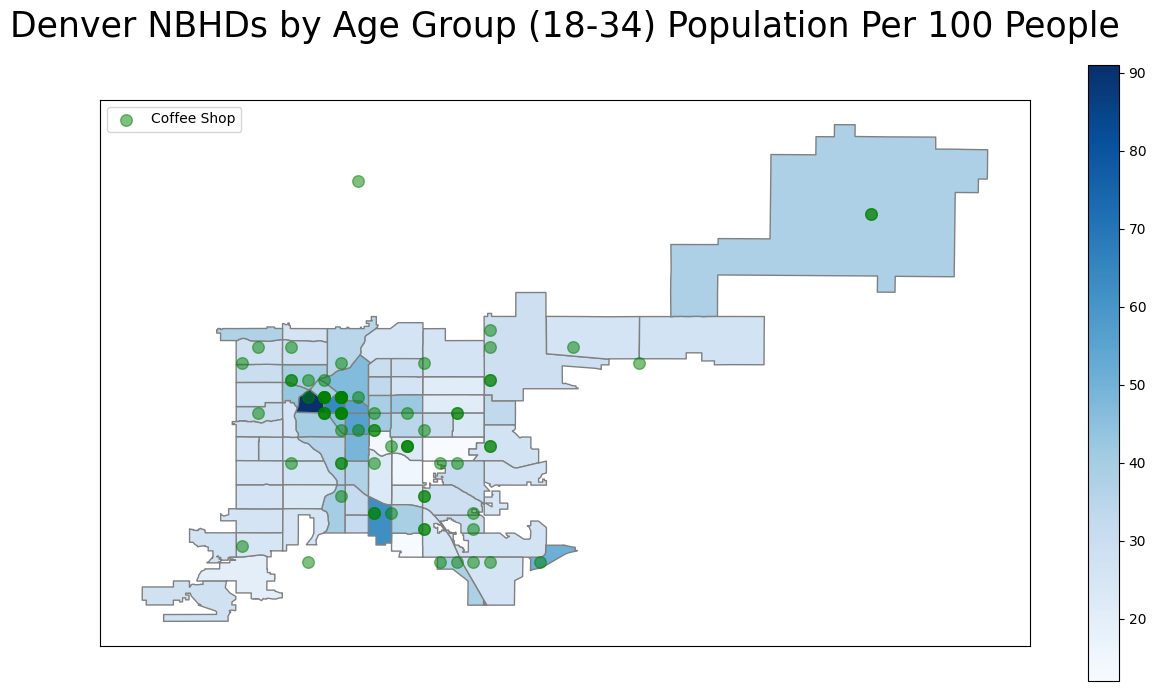

In [13]:
# Plot neighborhoods
neighborhoods_census.plot(legend=True, edgecolor='gray',
                          column='AGE_18_TO_34_PER_100_PEOPLE', cmap='Blues',
                          figsize=(15,8))

# Plot Starbucks
plt.scatter(x=coffee.Longitude, y=coffee.Latitude,
            c='green', s=70, alpha=0.5).set_label('Coffee Shop')
plt.title('Denver NBHDs by Age Group (18-34) Population Per 100 People', fontsize=25, y=1.1)
 
# Plot Settings
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.legend(loc='upper left')

plt.show()

In [14]:
# Top 3 neighborhoods by Age Group (18-34) Ratio
nbhd_age = neighborhoods_census.sort_values('AGE_18_TO_34_PER_100_PEOPLE', ascending=False)
nbhd_age[['NBHD_NAME', 'AGE_18_TO_34_PER_100_PEOPLE']].head(3)

,NBHD_NAME,AGE_18_TO_34_PER_100_PEOPLE
0,Auraria,91.0
48,CBD,64.0
23,University,62.0


The neighborhoods with the highest populations of targeted age groups are Auraria (91:100), Central Business District (64:100), and University (62:100).

## Top 3 Neighborhoods with the Most Households of +100k Income Per 100 People

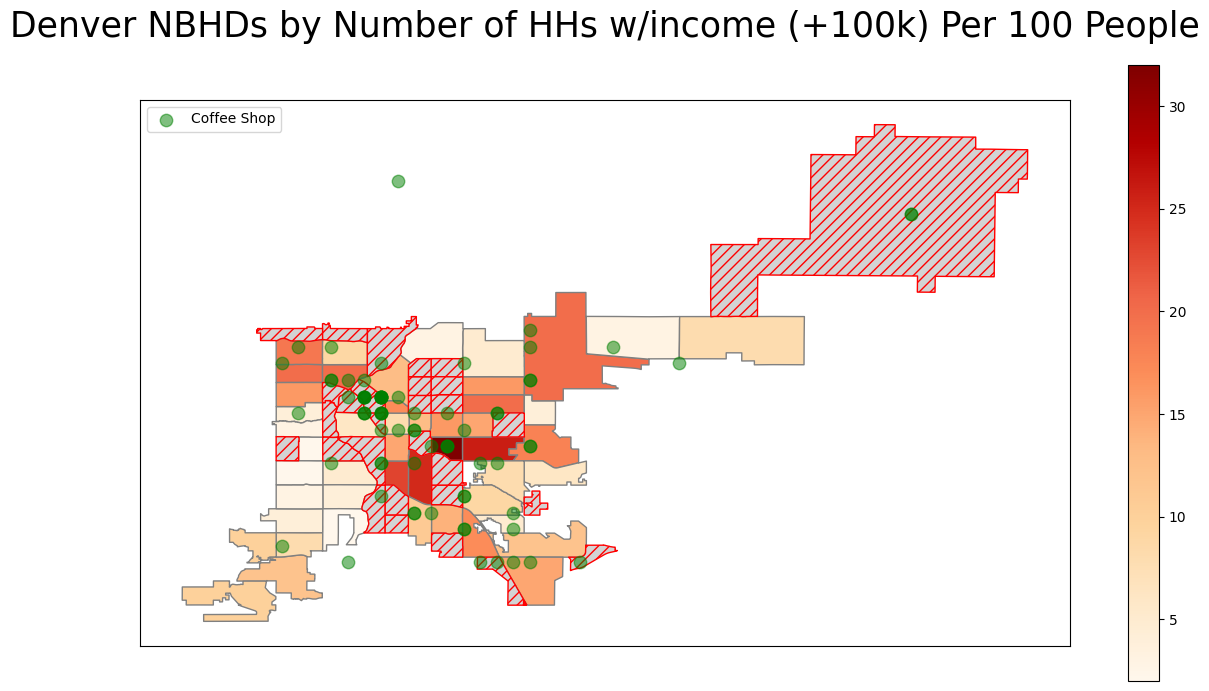

In [15]:
# Plot neighborhoods
neighborhoods_census.plot(legend=True, edgecolor='gray',
                   column='NUM_HHLD_100K+_PER_100_PEOPLE',
                   cmap='OrRd', figsize=(15,8),
                  missing_kwds={
                      "color": "lightgrey", "edgecolor": "red",
                      "hatch": "///", "label": "Missing values"})
 
# Plot Coffee shop
plt.scatter(x=coffee.Longitude, y=coffee.Latitude,
            c='green', s=80, alpha=0.5).set_label('Coffee Shop')
 
# Plot Settings
plt.title('Denver NBHDs by Number of HHs w/income (+100k) Per 100 People',
          fontsize=25, y=1.1)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.legend(loc='upper left')
 
plt.show()

In [16]:
# Top 3 neighborhoods by Number of Households +100k per 100 people
nbhd_hh = neighborhoods_census.sort_values('NUM_HHLD_100K+_PER_100_PEOPLE', ascending=False)
nbhd_hh[['NBHD_NAME', 'NUM_HHLD_100K+_PER_100_PEOPLE']].head(3)

,NBHD_NAME,NUM_HHLD_100K+_PER_100_PEOPLE
6,Cherry Creek,32.0
26,Hilltop,26.0
3,Washington Park,25.0


The neighborhoods with the most number of households with income +100k per 100 people are Cherry Creek (32:100), Hilltop (26:100), and Washington Park (25:100).

**NB:** The neighborhoods with missing data are marked with red strikethrough lines and gray background.

# 🏆 Which neighborhoods appear to be more attractive for our client's coffee shop?

Our client is interested in openning a coffee shop in Denver, claiming that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.

Let's define an `AFFLUENCE` score to determine which neighborhoods seem more attractive. We are interested in densed populated neighborhoods with young adults, and households with good purchasing power.

We can define our `AFFLUENCE` score as the following:
**_AFFLUENCE = MinMax(Number of People in Desired Age Group per 100 People x Number of Household Over 100K Income per People)_**

The `MinMax` term scales the affluence score between 0 and 1. Scores closer to 1 should be more attractive for our client based on the constraints. We are going to use the `sklearn` implementation which works with missing values `(np.nan)`. See MinMax reference here.

**Caveat:** For simplicity, we are only going to use one age group, 'AGE_18_TO_34_PER_100_PEOPLE', we believe this contains enough information of the desired demographic.

In [17]:
# Calculate affluence ratios
affluence_ratio = np.array(neighborhoods_census['AGE_18_TO_34_PER_100_PEOPLE'] * neighborhoods_census['NUM_HHLD_100K+_PER_100_PEOPLE'])
 
# Instantiate MinMax scaler
scaler = MinMaxScaler()
 
# Scale ratios
affluence_scaled = scaler.fit_transform(affluence_ratio.reshape(-1, 1))
 
# Assign affluence score to `neighborhoods_census` dataframe
neighborhoods_census['AFFLUENCE'] = np.round(affluence_scaled, 2)

neighborhoods_census.head()

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18_PER_100_PEOPLE,AGE_18_TO_34_PER_100_PEOPLE,AGE_35_TO_65_PER_100_PEOPLE,AGE_65_PLUS_PER_100_PEOPLE,NUM_HOUSEHOLDS_PER_100_PEOPLE,FAMILIES_PER_100_PEOPLE,NUM_HHLD_100K+_PER_100_PEOPLE,AFFLUENCE
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",705.0,1.0,91.0,8.0,1.0,9.0,2.0,NaN,NaN
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",3892.0,20.0,23.0,45.0,12.0,45.0,25.0,NaN,NaN
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",4172.0,15.0,15.0,46.0,24.0,51.0,28.0,NaN,NaN
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",6905.0,17.0,23.0,47.0,12.0,48.0,25.0,25.0,0.58
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,13.0,37.0,44.0,7.0,53.0,20.0,23.0,0.89


Awesome, let's look at the stats! 📊

In [18]:
# Summary Statistics
neighborhoods_census.iloc[:, 1:].describe().round(3)

,POPULATION_2010,AGE_LESS_18_PER_100_PEOPLE,AGE_18_TO_34_PER_100_PEOPLE,AGE_35_TO_65_PER_100_PEOPLE,AGE_65_PLUS_PER_100_PEOPLE,NUM_HOUSEHOLDS_PER_100_PEOPLE,FAMILIES_PER_100_PEOPLE,NUM_HHLD_100K+_PER_100_PEOPLE,AFFLUENCE
count,78.000,78.000,78.000,78.000,78.000,78.000,78.000,48.000,48.000
mean,7694.333,19.936,32.192,37.397,10.410,44.833,20.500,11.583,0.336
std,5166.831,9.749,12.206,6.791,5.148,12.100,4.893,7.351,0.266
min,705.000,1.000,12.000,8.000,1.000,9.000,2.000,2.000,0.000
25%,4213.000,14.250,26.000,34.000,7.000,35.250,19.000,5.000,0.090
50%,6701.500,19.000,28.500,37.000,10.000,45.000,21.000,10.500,0.270
75%,9640.000,25.750,37.750,42.000,13.000,50.000,23.000,16.250,0.535
max,30348.000,56.000,91.000,50.000,27.000,74.000,29.000,32.000,1.000


We can see that neighborhoods with an affluence score greater or equal to 0.54 belong to the top 25% according to our criteria.

## Top 3 Neighborhoods by Affluence Score

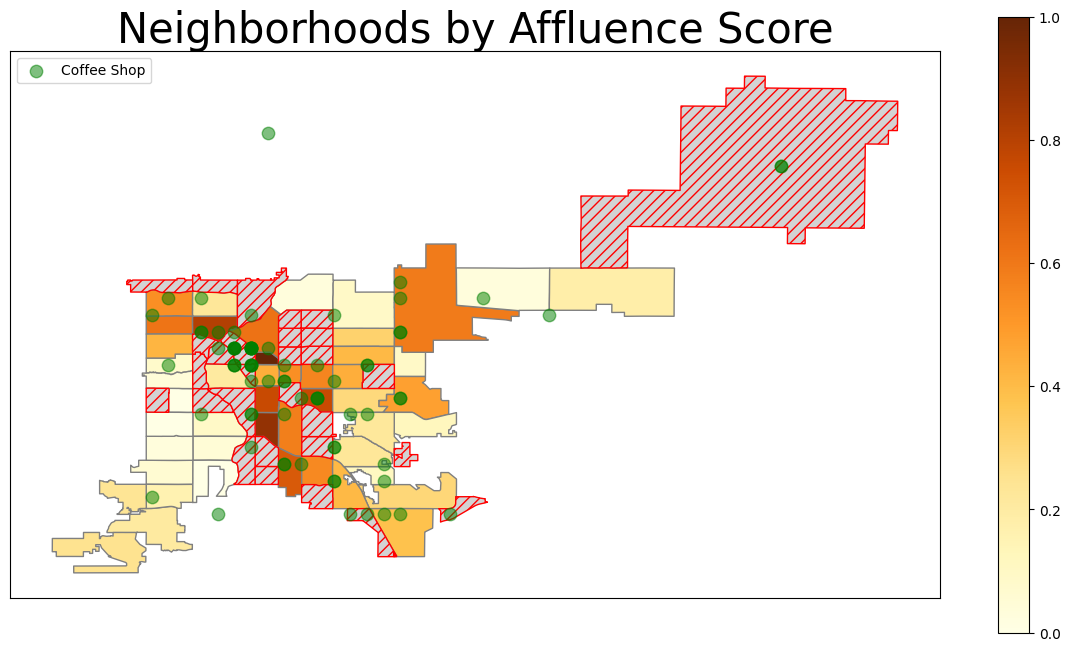

In [19]:
# Plot neighborhoods
neighborhoods_census.plot(legend=True, edgecolor='gray',
                   column='AFFLUENCE',
                   cmap='YlOrBr', figsize=(15,8),
                  missing_kwds={
                      "color": "lightgrey", "edgecolor": "red",
                      "hatch": "///", "label": "Missing values"})
 
# Plot Coffee Shop
plt.scatter(x=coffee.Longitude, y=coffee.Latitude,
            c='green', s=80, alpha=0.5).set_label('Coffee Shop')
 
# Plot Settings
plt.title('Neighborhoods by Affluence Score', fontsize=30)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.legend(loc='upper left')
 
plt.show()

In [20]:
# Top 5 Neighborhoods with the Highest Affluence Score
nbhd_aff = neighborhoods_census.sort_values('AFFLUENCE', ascending=False)
 
nbhd_aff[['NBHD_NAME','AGE_18_TO_34_PER_100_PEOPLE','NUM_HHLD_100K+_PER_100_PEOPLE', 'AFFLUENCE']].head()

,NBHD_NAME,AGE_18_TO_34_PER_100_PEOPLE,NUM_HHLD_100K+_PER_100_PEOPLE,AFFLUENCE
46,North Capitol Hill,56.0,17.0,1.00
4,Washington Park West,37.0,23.0,0.89
20,Highland,39.0,20.0,0.81
5,Speer,49.0,15.0,0.76
6,Cherry Creek,23.0,32.0,0.76


We can observe that North Capital Hill (1), Washington Park West (0.89), and Highland (0.81) have the highest affluence scores in the top 5.

We can also observe the ratios of the variables that affect the affluence score. For instance, Cherry Creek has an outstanding ratio of `NUM_HHLD_100K+_PER_100_PEOPLE` (32, max ratio), but its affluence score was offset by `AGE_18_TO_34_PER_100_PEOPLE`.

# 👍 Suggested Locations for a Coffee Shop

In [26]:
# Identify Suggested Neighborhoods
nbhd_aff['SUGGESTED'] = nbhd_aff['AFFLUENCE'].apply(lambda x: True if x>=0.81 else False)
 
# Assign the centroids
nbhd_aff['centroid'] = nbhd_aff['geometry'].centroid
 
# Extract longitude and latitude from the centroids
nbhd_aff["lng"] = nbhd_aff.centroid.map(lambda p: p.x)
nbhd_aff["lat"] = nbhd_aff.centroid.map(lambda p: p.y)
 
nbhd_aff.head(3)

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18_PER_100_PEOPLE,AGE_18_TO_34_PER_100_PEOPLE,AGE_35_TO_65_PER_100_PEOPLE,AGE_65_PLUS_PER_100_PEOPLE,NUM_HOUSEHOLDS_PER_100_PEOPLE,FAMILIES_PER_100_PEOPLE,NUM_HHLD_100K+_PER_100_PEOPLE,AFFLUENCE,SUGGESTED,centroid,lng,lat
46,47,North Capitol Hill,"POLYGON ((-104.97338 39.74378, -104.97339 39.7...",5823.0,3.0,56.0,34.0,7.0,66.0,8.0,17.0,1.00,True,POINT (-104.98090 39.74355),-104.980897,39.743550
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,13.0,37.0,44.0,7.0,53.0,20.0,23.0,0.89,True,POINT (-104.97990 39.70258),-104.979904,39.702575
20,36,Highland,"POLYGON ((-104.99820 39.76930, -104.99821 39.7...",8429.0,15.0,39.0,37.0,9.0,49.0,18.0,20.0,0.81,True,POINT (-105.01231 39.76326),-105.012310,39.763263


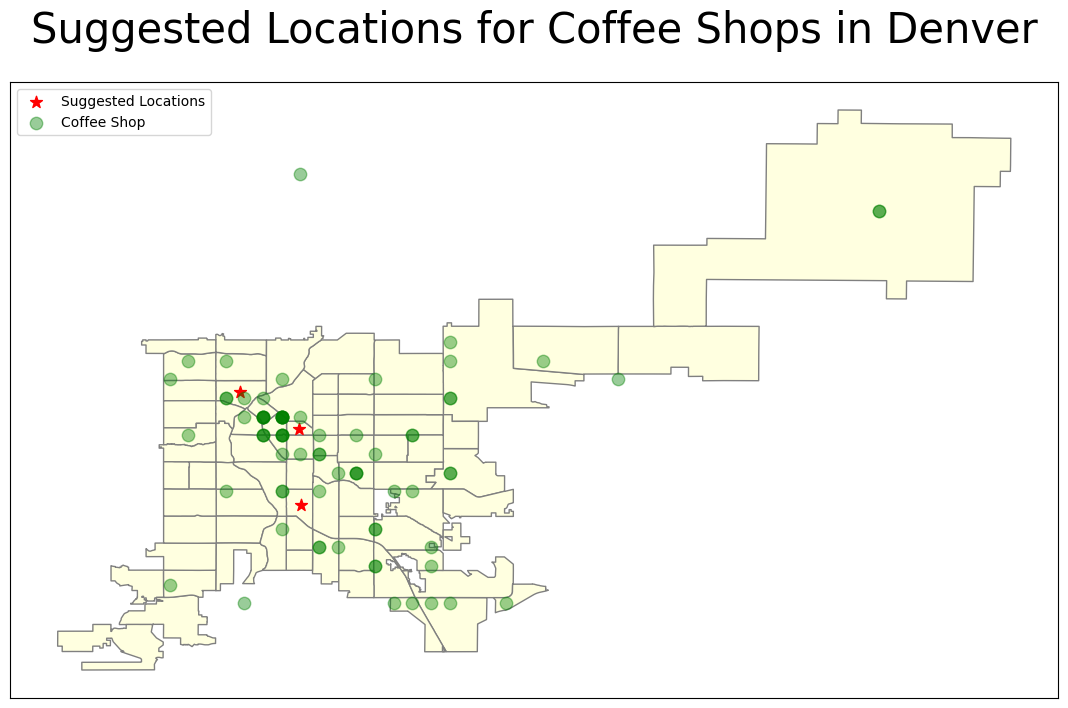

In [22]:
# Plot neighborhoods
nbhd_aff.plot(legend=True, edgecolor='gray',
                   column='SUGGESTED',
                   color='lightyellow', figsize=(15,8))
 
# Plot Suggested Locations
plt.scatter(x=nbhd_aff.lng[:3], y=nbhd_aff.lat[:3],
            c='red', s=80, alpha=1, marker='*').set_label('Suggested Locations')
plt.scatter(x=coffee.Longitude, y=coffee.Latitude,
            c='green', s=80, alpha=0.4).set_label('Coffee Shop')
 
# Plot Settings
plt.title('Suggested Locations for Coffee Shops in Denver', fontsize=30, y=1.05)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.legend(loc='upper left')
 
plt.show()

The neighborhoods of **North Capital Hill**, **Washington Park West**, and **Highland** are great candidates to open a coffee shop, we suggest our client to start the search in these locations. These locations combine the initial aspects our client is looking for, affluent households, and a young adult age group.

I hope you have enjoyed and learned something new in this publication. Thank you!